# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Sulthan Nasyira
- **Email:** mc589d5y2486@student.devacademy.id
- **ID Dicoding:** MC589D5Y2486

## Menentukan Pertanyaan Bisnis

- Apakah ada pola musiman (harian atau bulanan) dalam konsentrasi PM2.5 pada distrik changping?
- Bagaimana hubungan antara kecepatan angin (WSPM) dan konsentrasi PM2.5 pada distrik changping?

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Data Wrangling


### Gathering Data

In [15]:
# Membaca dataset
file_path = '/data/data_1.csv'
df = pd.read_csv(file_path)

# Menampilkan informasi awal dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Dataset ini terdiri dari data kualitas udara yaitu konsentrasi PM2.5 dan parameter cuaca

- Kolom utama: 'year', 'month', 'day', 'hour', 'PM2.5', 'WSPM'

### Assessing Data

In [16]:
# Mengecek missing values
df.isnull().sum()

# Statistik deskriptif
df.describe()

# Mengecek data unik di setiap kolom
df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,481
PM10,562
SO2,294
NO2,459
CO,115


**Insight:**
- Banyak missing values pada kolom 'PM2.5' yang perlu untuk kita tindaklanjuti
- Kolom waktu memiliki data yang lengkap untuk analisis musiman

### Cleaning Data

In [17]:
# Mengisi missing values PM2.5 dengan median
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)

# Menggabungkan kolom waktu menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Mengatur datetime sebagai index
df.set_index('datetime', inplace=True)

# Menghapus kolom yang tidak perlu
df.drop(columns=['No'], inplace=True)

df.head()

<ipython-input-17-6192156feb59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2013-03-01 01:00:00,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2013-03-01 02:00:00,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
2013-03-01 03:00:00,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


**Insight:**
- Missing values dapat kita isi dengan median untuk menjaga distribusi data
- Data waktu digabungin agar lebih mudah digunakan untuk analisis musiman

## Exploratory Data Analysis (EDA)

### Explore ...

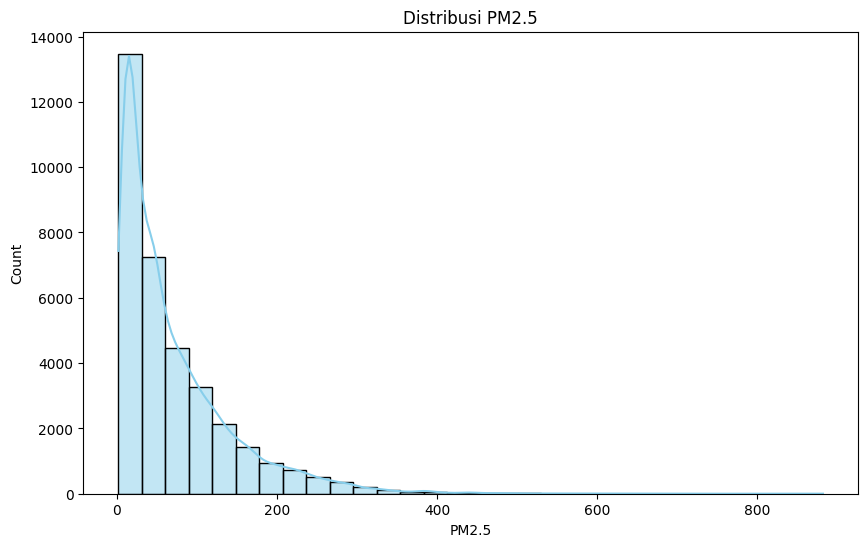

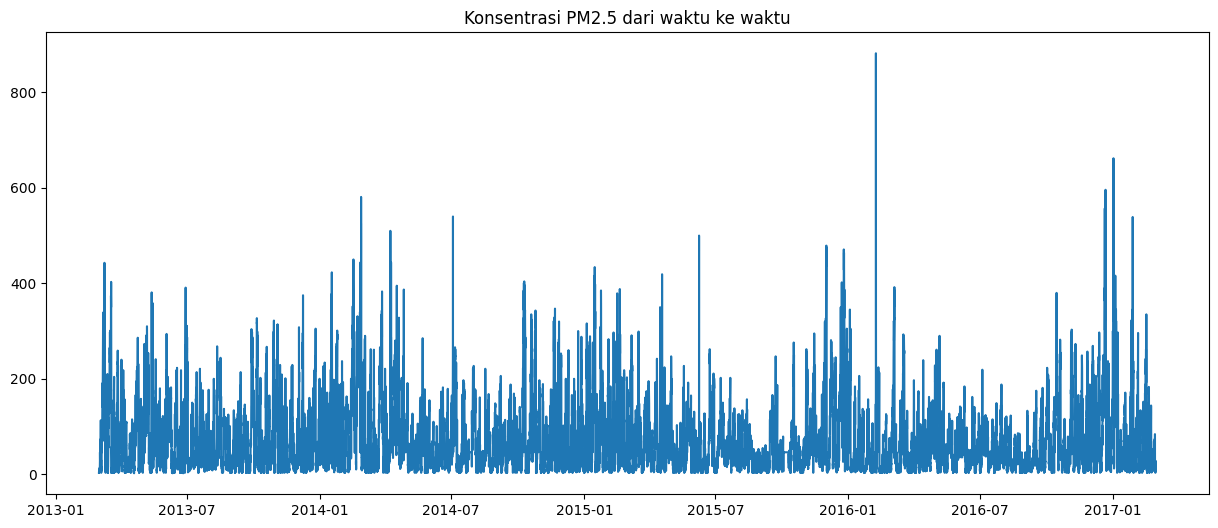

In [18]:
# Visualisasi distribusi PM2.5
plt.figure(figsize=(10, 6))
sns.histplot(df['PM2.5'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi PM2.5')
plt.show()

# Tren waktu PM2.5
plt.figure(figsize=(15, 6))
plt.plot(df['PM2.5'])
plt.title('Konsentrasi PM2.5 dari waktu ke waktu')
plt.show()

**Insight:**
- Distribusi PM2.5 menunjukkan puncak yang dicurigai sebagai hubungan nya dengan kecepatan angin
- Ada pola musiman yang tampak jelas (fluktuasi)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-19-6ce6964b86b3>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')['PM2.5'].mean()


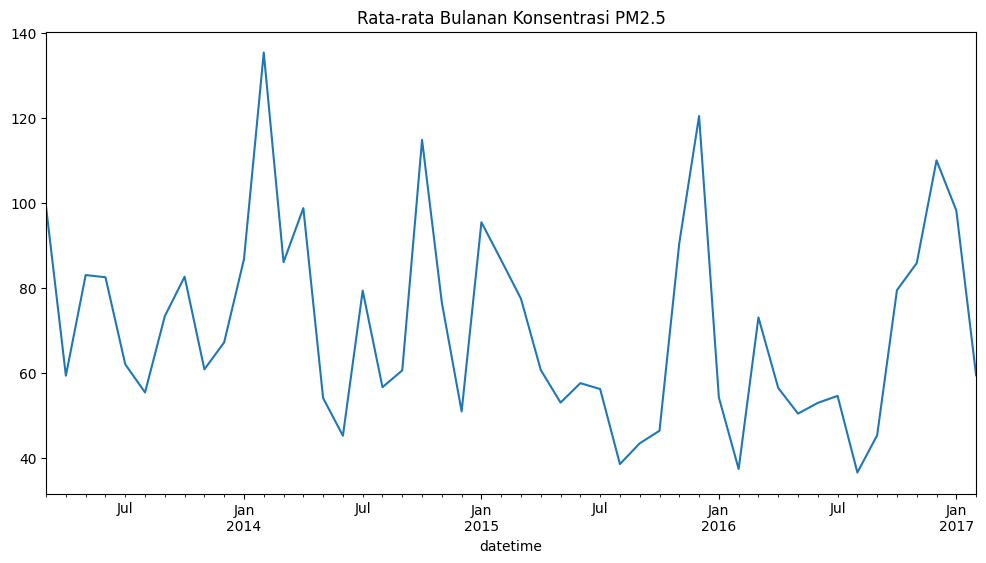

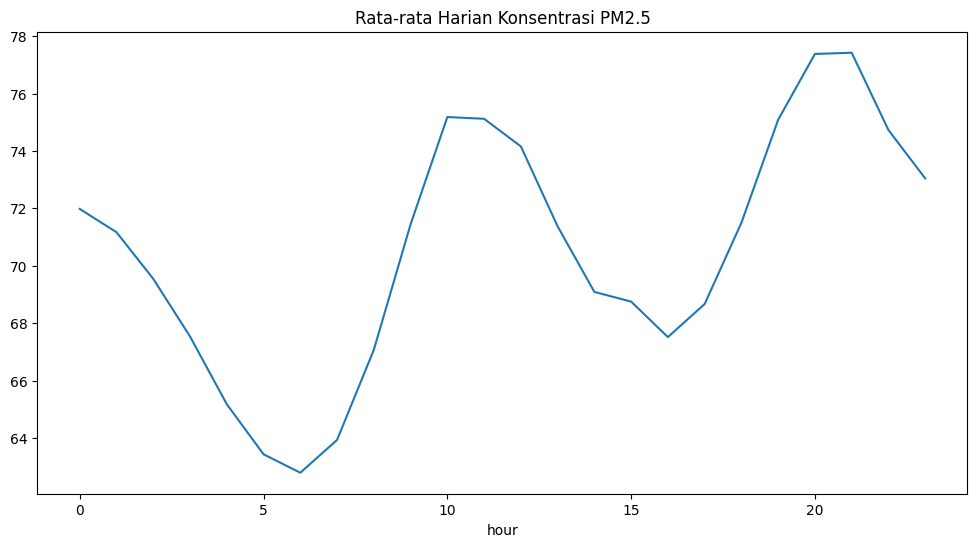

In [19]:
# Pola musiman bulanan
monthly_avg = df.resample('M')['PM2.5'].mean()
plt.figure(figsize=(12, 6))
monthly_avg.plot()
plt.title('Rata-rata Bulanan Konsentrasi PM2.5')
plt.show()

# Pola musiman harian
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour')['PM2.5'].mean()
plt.figure(figsize=(12, 6))
hourly_avg.plot()
plt.title('Rata-rata Harian Konsentrasi PM2.5')
plt.show()

### Pertanyaan 2:

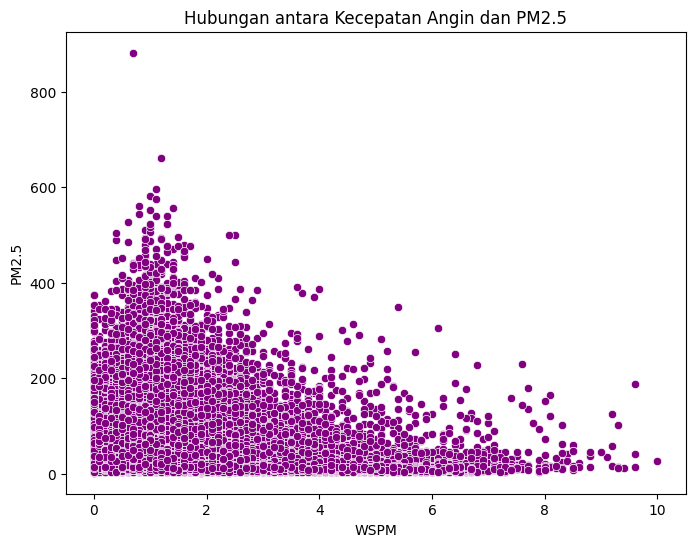

Korelasi PM2.5 dan WSPM:
           PM2.5      WSPM
PM2.5  1.000000 -0.270405
WSPM  -0.270405  1.000000


In [20]:
# Hubungan antara kecepatan angin dan PM2.5
plt.figure(figsize=(8, 6))
sns.scatterplot(x='WSPM', y='PM2.5', data=df, color='purple')
plt.title('Hubungan antara Kecepatan Angin dan PM2.5')
plt.show()

# Korelasi
corr = df[['PM2.5', 'WSPM']].corr()
print('Korelasi PM2.5 dan WSPM:\n', corr)

**Insight:**
- Konsentrasi PM2.5 cenderung lebih tinggi pada musim dingin dan malam hari
- WSPM dan PM2.5 menunjukkan hubungan korelasi negatif lemah (-0.27)

## Analisis Lanjutan (Opsional)

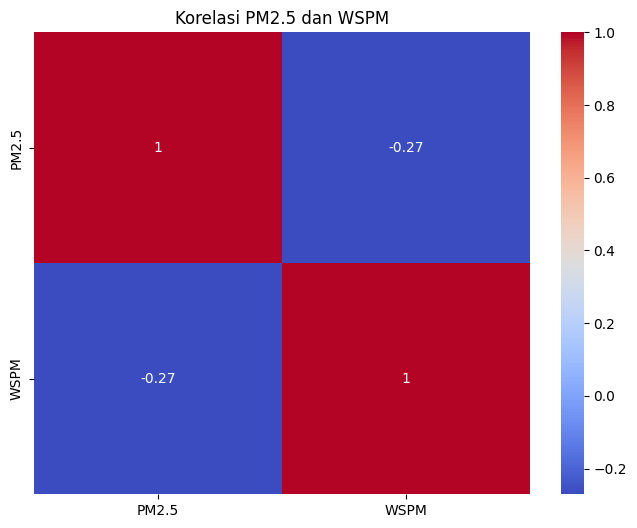

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['PM2.5', 'WSPM']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi PM2.5 dan WSPM')
plt.show()

## Conclusion

- Pola musiman menunjukkan bahwa konsentrasi PM2.5 meningkat pada malam hari dan selama musim dingin, kemungkinan karena inversi suhu dan peningkatan penggunaan pemanas rumah tangga yang membakar bahan bakar fosil
- Hubungan antara kecepatan angin (WSPM) dan PM2.5 menunjukkan bahwa meskipun angin membantu menyebarkan polusi, efeknya cukup lemah. Faktor lain seperti sumber polusi tetap memengaruhi tingkat PM2.5 secara signifikan